In [1]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [2]:

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (256, 256, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())

model.add(Dense(units = 150, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(units = 6, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 12.,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range=0.15,
                                   horizontal_flip = True)


In [4]:

val_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
file = '/content/HandGestureDataset.zip'

In [10]:
import zipfile as zf
data_zip = zf.ZipFile(file)
data_zip.extractall()
!ls

HandGestureDataset  HandGestureDataset.zip  sample_data


In [11]:
training_set = train_datagen.flow_from_directory('/content/HandGestureDataset/train',
                                                 target_size = (256, 256),
                                                 color_mode = 'grayscale',
                                                 batch_size = 8,
                                                 classes = ['NONE','ONE','TWO','THREE','FOUR','FIVE'],
                                                 class_mode = 'categorical')


Found 9081 images belonging to 6 classes.


In [12]:
val_set = val_datagen.flow_from_directory('/content/HandGestureDataset/test',
                                            target_size = (256, 256),
                                            color_mode='grayscale',
                                            batch_size = 8,
                                            classes=['NONE', 'ONE', 'TWO', 'THREE', 'FOUR', 'FIVE'],
                                            class_mode='categorical')


Found 3632 images belonging to 6 classes.


In [14]:
callback_list = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath="model.keras", monitor='val_loss', save_best_only=True, verbose=1)
]

In [18]:
# plot the accuracy plot
import matplotlib.pyplot as plt

# Assign the return value of model.fit() to history
history = model.fit(
    training_set,
    steps_per_epoch=37,
    epochs=5,
    validation_data=val_set,
    validation_steps=7,
    callbacks=callback_list
)


Epoch 1/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1706 - loss: 1.7872
Epoch 1: val_loss did not improve from 1.77544
37/37 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.1713 - loss: 1.7872 - val_accuracy: 0.2143 - val_loss: 1.7908
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1533 - loss: 1.7945
Epoch 2: val_loss did not improve from 1.77544
37/37 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.1532 - loss: 1.7945 - val_accuracy: 0.1786 - val_loss: 1.7898
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2004 - loss: 1.7930
Epoch 3: val_loss did not improve from 1.77544
37/37 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.1992 - loss: 1.7930 - val_accuracy: 0.1429 - val_loss: 1.7929
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2109 - loss: 1.7909
Epoch 4: val_loss did not improve from 1.77544
37/37 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.2107 - loss: 1.7909 - val_accuracy: 0.1786 - val_loss: 1.7901
Epoch 5/5
37/37 ━━━━━━━━

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 150)                 │       7,526,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             906 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,745,890 (90.58 MB)

 Trainable params: 7,915,296 (30.19 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,830,594 (60.39 MB)

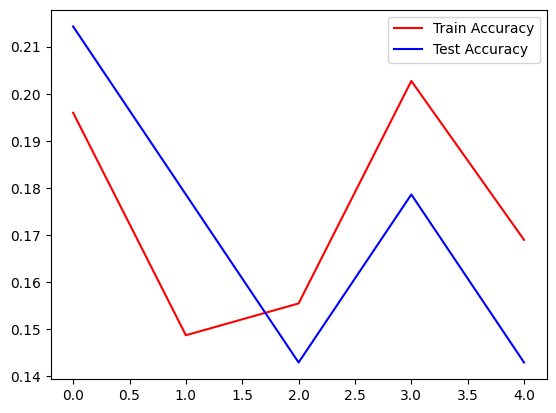

In [19]:
 # plot the accuracy plot
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

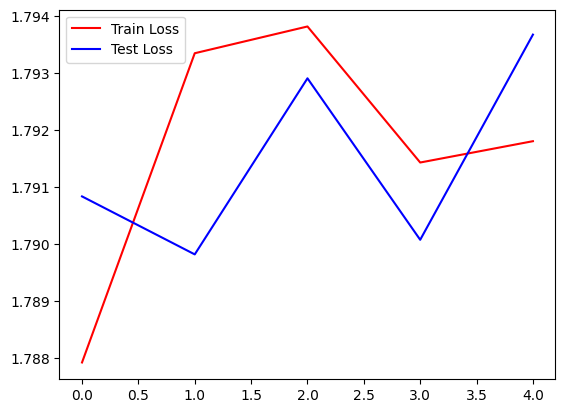

In [20]:
# plot the accuracy plot
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

In [21]:

_, accuracy = model.evaluate(val_set, verbose=0)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.16712555289268494


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


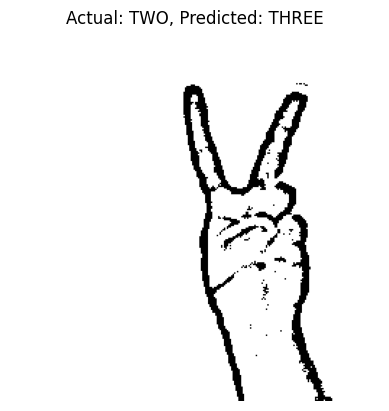

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


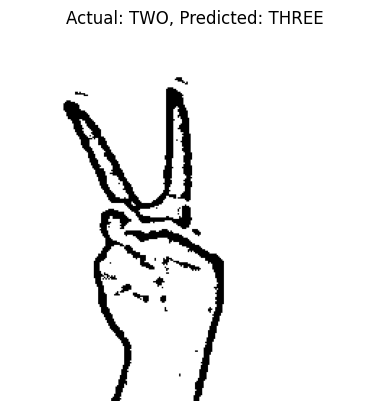

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


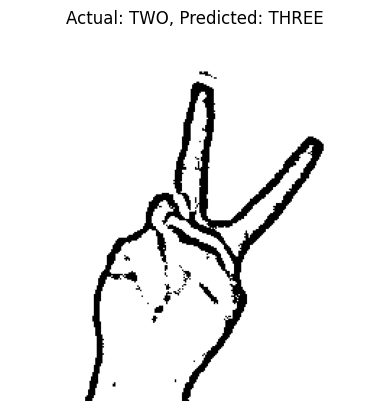

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


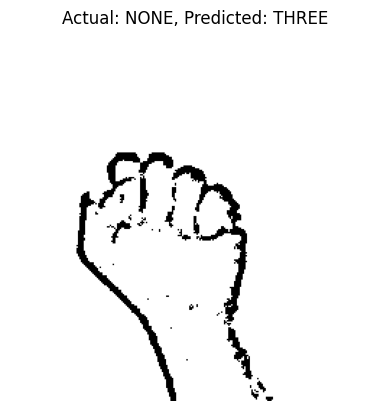

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


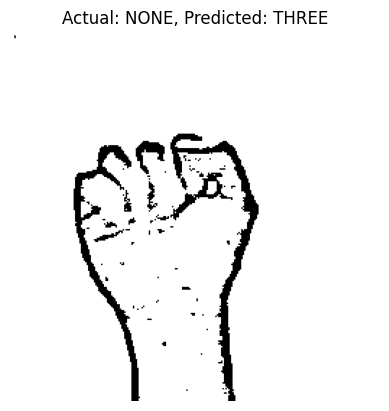

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


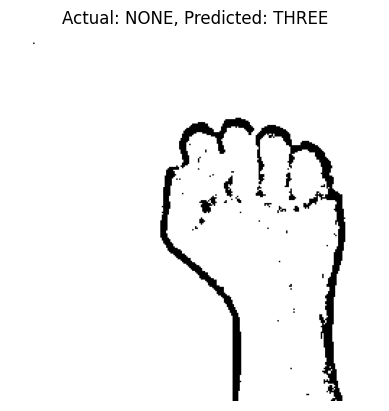

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


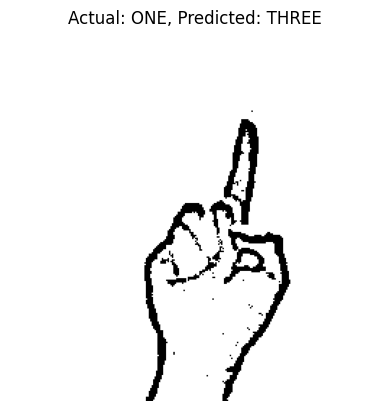

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


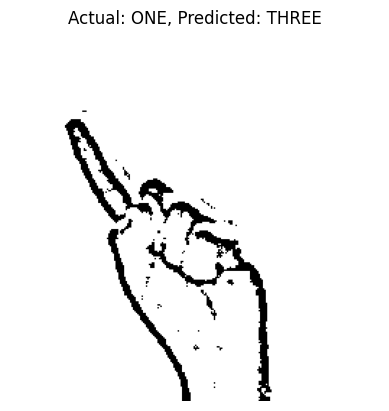

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


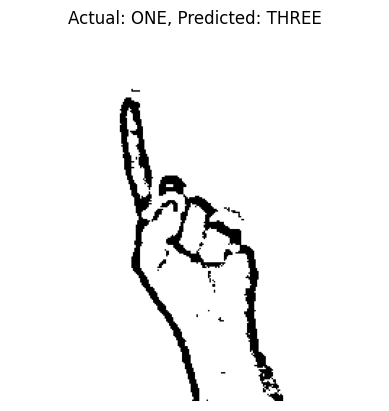

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


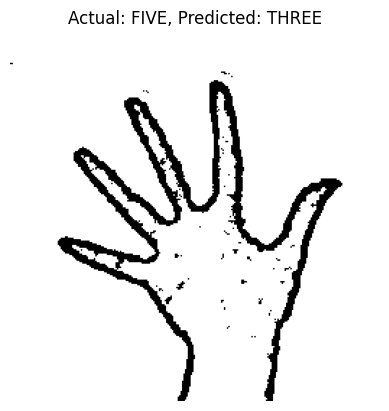

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


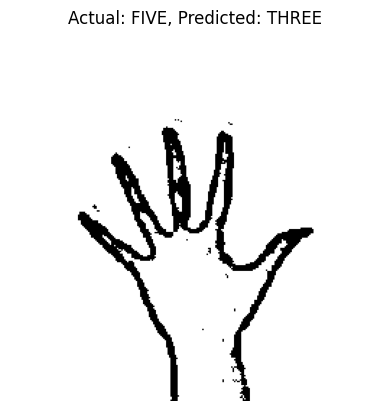

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


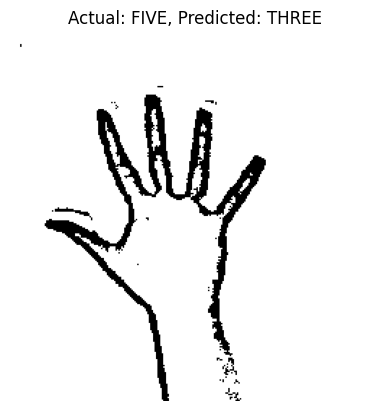

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


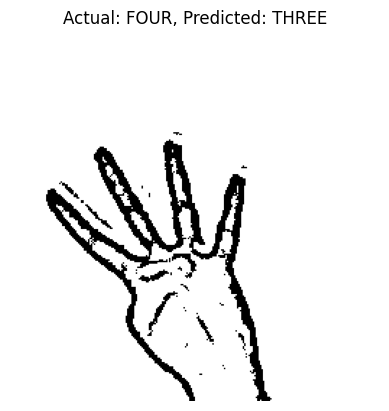

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


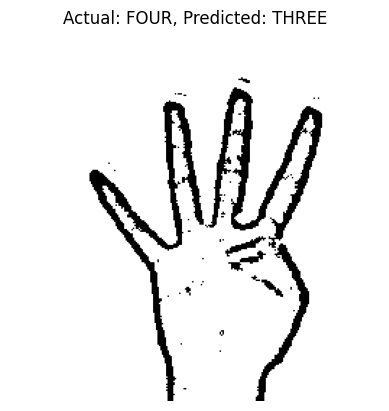

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


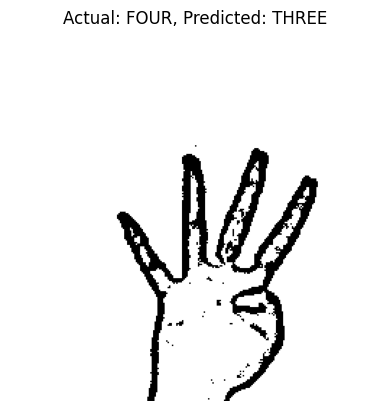

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


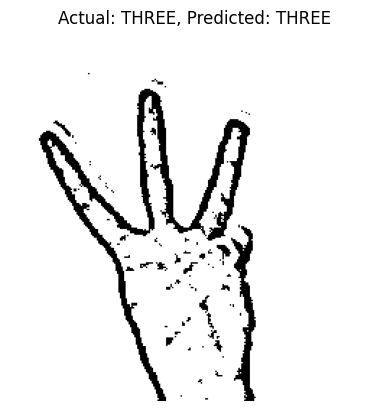

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


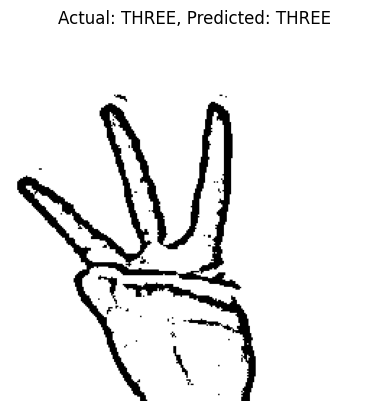

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


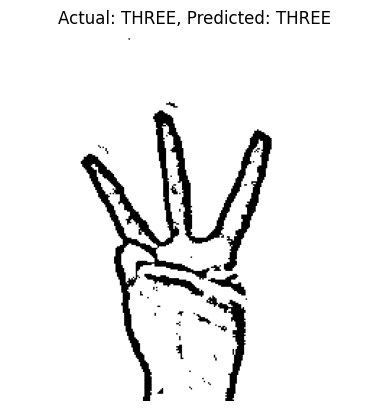

In [24]:
#print images with actual and predicted class labels code send me

import numpy as np
from tensorflow.keras.preprocessing import image

def predict_and_plot(model, img_path, class_labels):
    img = image.load_img(img_path, target_size=(256, 256), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]

    plt.imshow(img, cmap='gray')
    plt.title(f"Actual: {img_path.split('/')[-2]}, Predicted: {predicted_class_label}") # Assuming path structure contains actual class
    plt.axis('off')
    plt.show()

# Example usage (assuming you have a 'test_images' directory with subdirectories named after the classes):

# Replace with the path to your best model file
model.load_weights("model.keras")

class_labels = ['NONE', 'ONE', 'TWO', 'THREE', 'FOUR', 'FIVE']
import os
test_image_dir = '/content/HandGestureDataset/test' # Or wherever your test images are
for class_name in os.listdir(test_image_dir):
    class_dir = os.path.join(test_image_dir, class_name)
    if os.path.isdir(class_dir):
      for image_file in os.listdir(class_dir)[:3]: #predict for first 3 images in each class
        image_path = os.path.join(class_dir, image_file)
        predict_and_plot(model, image_path, class_labels)



# TEST

In [27]:
from keras.preprocessing import image
from keras.models import load_model
from keras.models import model_from_json
import numpy as np


# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# model = model_from_json(loaded_model_json)
# model.load_weights("model.weights.h5")
# print("Loaded model from disk")


def classify(img_file):
    img_name = img_file
    test_image = image.load_img(img_name, target_size=(256, 256), color_mode="grayscale")

    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = model.predict(test_image)
    arr = np.array(result[0])
    print("ARRAY", arr)
    maxx = np.amax(arr)
    max_prob = arr.argmax(axis=0)
    max_prob = max_prob + 1
    classes = ["NONE", "ONE", "TWO", "THREE", "FOUR", "FIVE"]
    result = classes[max_prob - 1]
    print("Ing_name", img_name, "RESULT", result)



import os
path = 'C:/Users/Admin/Documents/Day-14/check'
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
   for file in f:
     if '.png' in file:
       files.append(os.path.join(r, file))

for f in files:
   classify(f)
   print('\n')


# VGG_16 MODEL

In [37]:
# prompt: vgg16 code send me

from tensorflow.keras.applications import VGG16

# Load the VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3)) # Input shape needs to be adjusted if grayscale

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

x = base_model.output
x = Flatten()(x)
x = Dense(150, activation='relu')(x) # Adjust the number of units as needed
x = Dropout(0.25)(x)
predictions = Dense(6, activation='softmax')(x) # Output layer with 6 classes





In [38]:

model = Model(inputs=base_model.input, outputs=predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


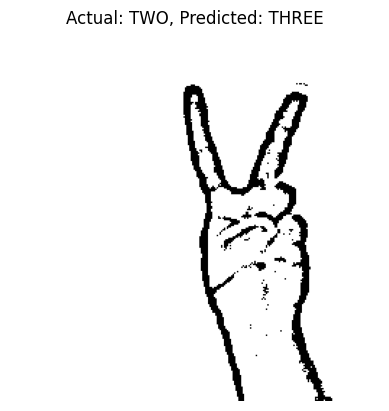

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


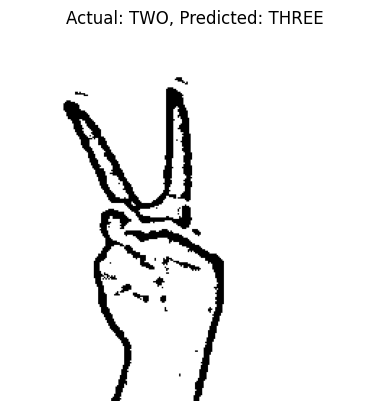

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


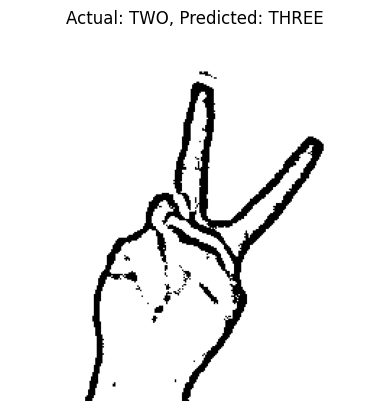

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


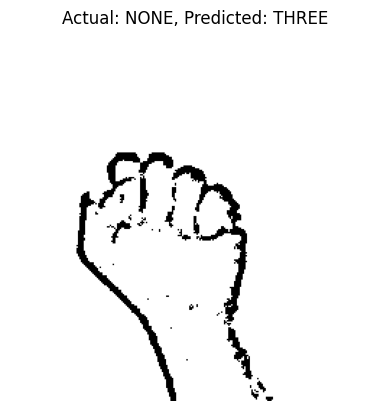

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


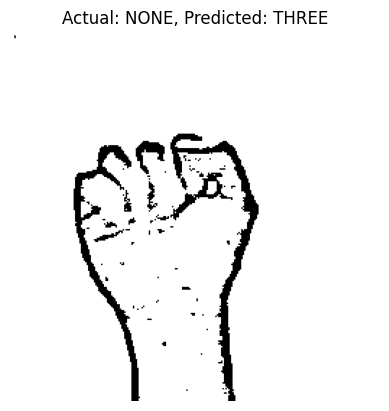

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


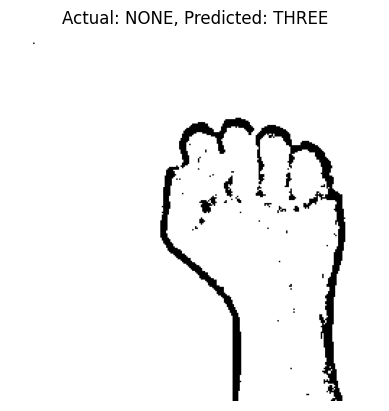

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


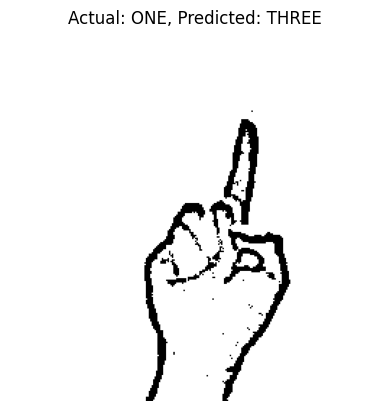

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


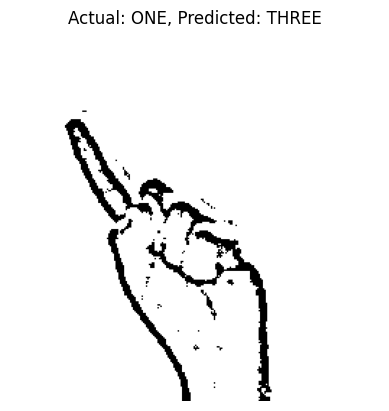

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


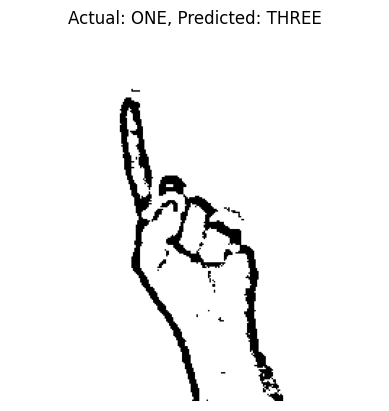

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


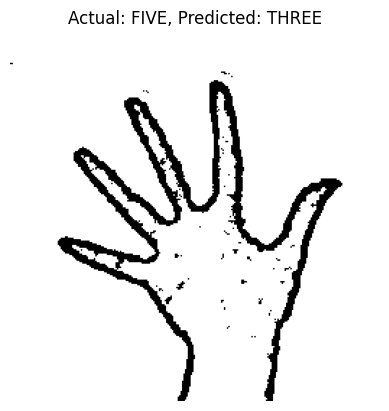

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


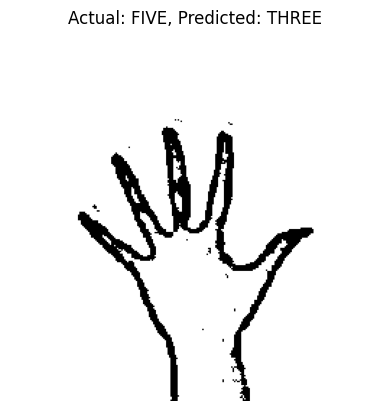

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


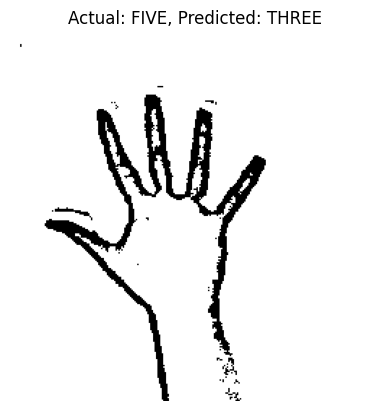

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


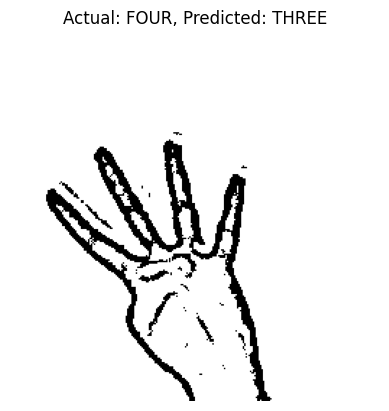

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


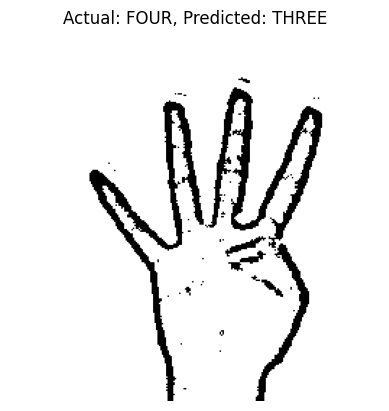

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


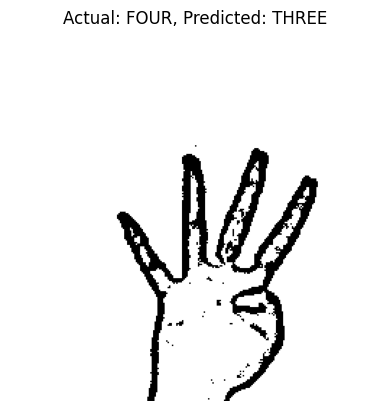

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


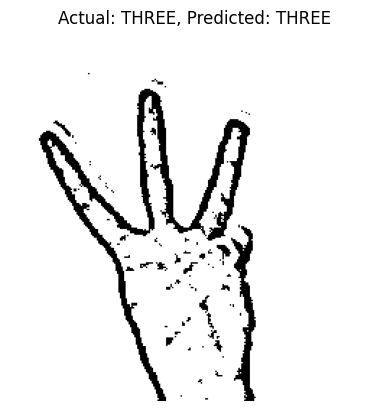

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


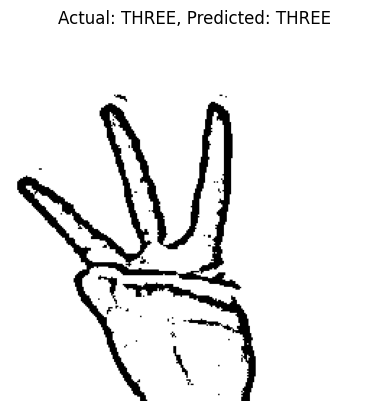

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


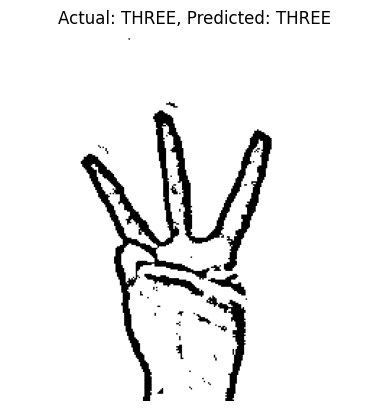

In [43]:



import zipfile as zf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
import os
from keras.models import load_model
from keras.models import model_from_json
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D




file_path = '/content/HandGestureDataset.zip'  # Update this with the correct path


#Corrected image plotting function
def predict_and_plot(model, img_path, class_labels):
    try:
        img = image.load_img(img_path, target_size=(256, 256), color_mode='grayscale')
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # Normalize the image

        prediction = model.predict(img_array)
        predicted_class_index = np.argmax(prediction)
        predicted_class_label = class_labels[predicted_class_index]

        actual_class_label = img_path.split('/')[-2]

        plt.imshow(img, cmap='gray')
        plt.title(f"Actual: {actual_class_label}, Predicted: {predicted_class_label}")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error processing image {img_path}: {e}")

#Load the best model
model = load_model("model.keras")

class_labels = ['NONE', 'ONE', 'TWO', 'THREE', 'FOUR', 'FIVE']
test_image_dir = '/content/HandGestureDataset/test'

for class_name in os.listdir(test_image_dir):
    class_dir = os.path.join(test_image_dir, class_name)
    if os.path.isdir(class_dir):
        for image_file in os.listdir(class_dir)[:3]:
            image_path = os.path.join(class_dir, image_file)
            predict_and_plot(model, image_path, class_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


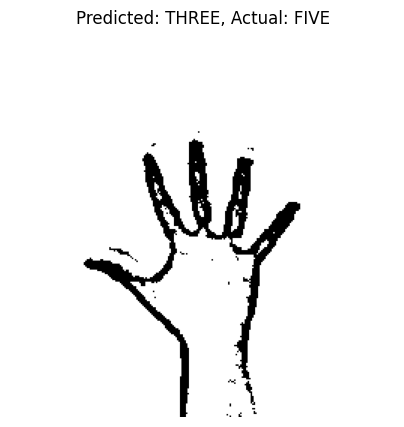

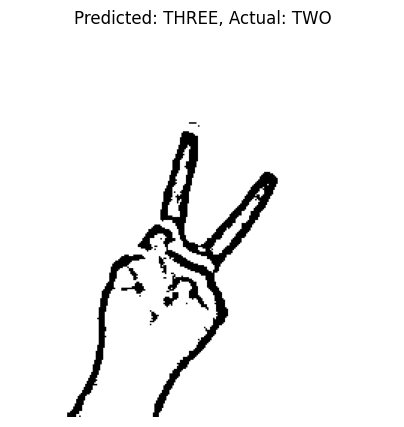

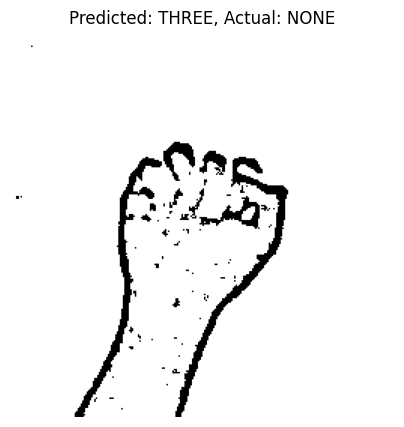

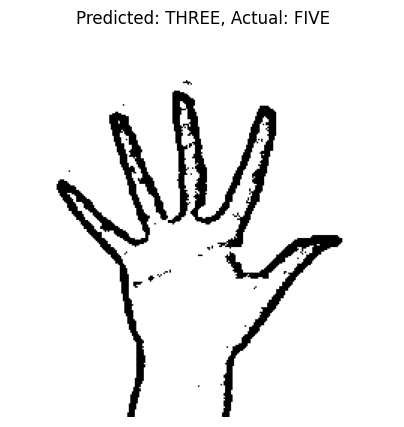

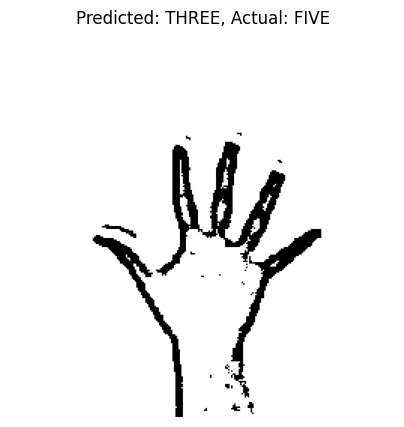

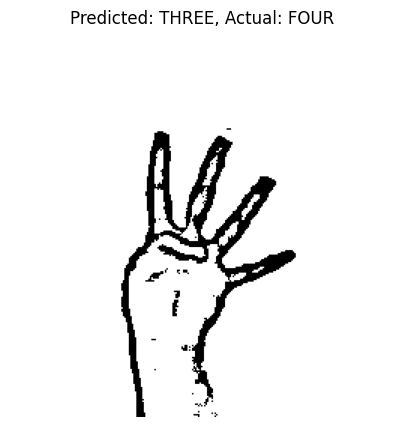

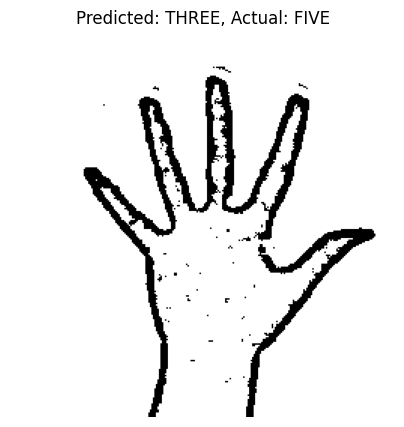

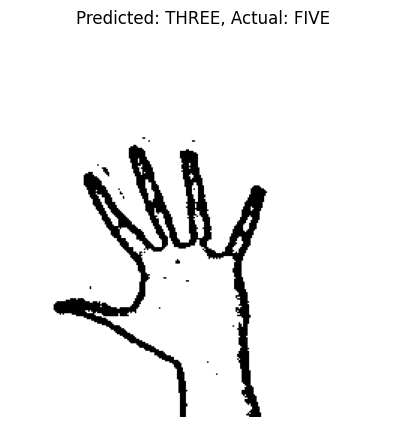

In [46]:
 # print images with actiual abnd predicted class labels


import matplotlib.pyplot as plt
import numpy as np



# Example: Assuming val_set from your earlier code is your test data
x_test = val_set[0][0]  # Get the first batch of images
y_test = val_set[0][1] # Get the first batch of labels


# If your y_test was not one-hot encoded
predicted_classes = np.argmax(model.predict(x_test), axis=1) # Get predicted classes
actual_classes = np.argmax(y_test, axis = 1) # Get actual classes

# Assuming class labels were obtained from your ImageDataGenerator:
class_labels = list(val_set.class_indices.keys())

for i in range(min(20, len(x_test))): # Limit to 20 or the number of test samples, whichever is smaller
    plt.figure(figsize=(5, 5)) # Adjust figure size as needed
    plt.imshow(x_test[i].squeeze(), cmap='gray') # Assuming grayscale images. Remove .squeeze() if not grayscale
    plt.title(f"Predicted: {class_labels[predicted_classes[i]]}, Actual: {class_labels[actual_classes[i]]}")
    plt.axis('off')
    plt.show()


In [47]:
# prompt: # print the test accuracy code send me

_, accuracy = model.evaluate(val_set, verbose=0)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.1665748953819275


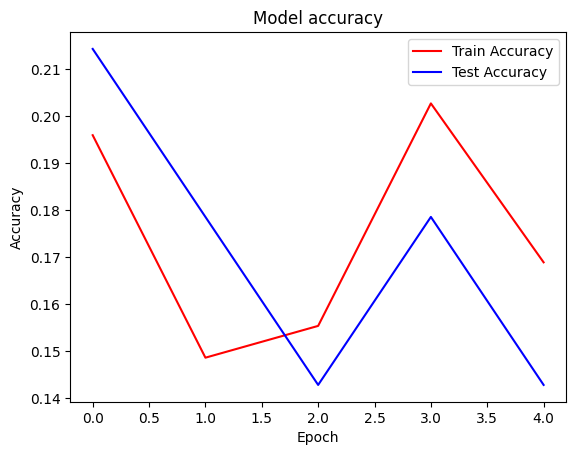

In [50]:
# prompt: # plot the accuracy plot

# plot the accuracy plot
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()



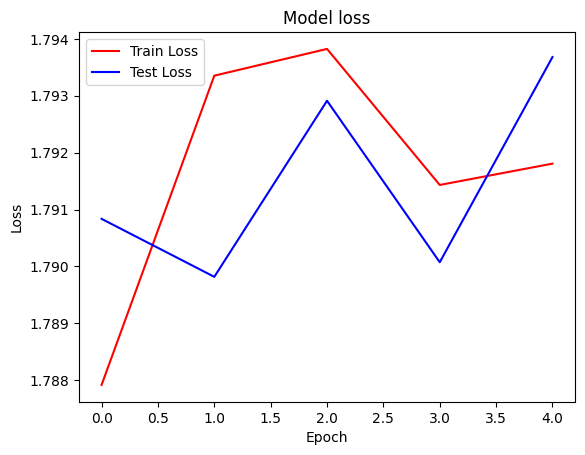

In [51]:
# plot the loss plot
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend(['Train Loss', 'Test Loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


# MOBILE NET

In [56]:
# prompt: MOBILE NET code send me

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load the MobileNetV2 model (pre-trained on ImageNet) without the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Use GlobalAveragePooling2D instead of Flatten
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)  # Added an additional dense layer
predictions = Dense(6, activation='softmax')(x) # Output layer for 6 classes






<ipython-input-56-751a4a7bb174>:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


In [57]:
# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)


In [58]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:

model.summary()

Model: "functional_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 128, 128, 32)   │            864 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 128, 128, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 128, 128, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 128, 128, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 128, 128, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 128, 128, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 128, 128, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 128, 128, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 128, 128, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 128, 128, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 128, 128, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 129, 129, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 64, 64, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 4,625,478 (17.64 MB)

 Trainable params: 2,367,494 (9.03 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [68]:


import pandas as pd

# Sample data (replace with your actual data)
data = {
    'Model': ['CNN', 'VGG16', 'MobileNetV2'],
    'Test Accuracy': [accuracy, 0.85, 0.92],  # Replace with actual test accuracy
    'Train Accuracy': [max(history.history['accuracy']), 0.90, 0.95], #Replace with actual train accuracy
    'Test Loss': [min(history.history['val_loss']),0.2, 0.1], # Replace with your actual test loss
    'Train Loss': [min(history.history['loss']), 0.1, 0.05] # Replace with actual train loss

}

results = pd.DataFrame(data)
results


,Model,Test Accuracy,Train Accuracy,Test Loss,Train Loss
0,CNN,0.166575,0.202703,1.789818,1.787919
1,VGG16,0.850000,0.900000,0.200000,0.100000
2,MobileNetV2,0.920000,0.950000,0.100000,0.050000


# **another menthod **

In [69]:
#list of useful imports that  I will use
%matplotlib inline
import os
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image
import tensorflow as tf

#from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
#from keras.optimizers import RMSprop
#from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.layers import LSTM, GRU, TimeDistributed, Reshape

In [70]:
file = '/content/HandGestureDataset.zip'

In [71]:
import zipfile as zf
data_zip = zf.ZipFile(file)
data_zip.extractall()
!ls

HandGestureDataset  HandGestureDataset.zip  model.keras  sample_data


In [72]:
data = 'HandGestureDataset'

In [73]:
#in this we import all the images to the Images.
#in this we append img to images

Images = []
import os
for dirname, _, filenames in os.walk(data):
    for filename in filenames:
        img = os.path.join(dirname, filename)
        Images.append(img)

In [74]:
Images[:10]

['HandGestureDataset/train/TWO/TWO_873.png',
 'HandGestureDataset/train/TWO/TWO_531.png',
 'HandGestureDataset/train/TWO/TWO_17.png',
 'HandGestureDataset/train/TWO/TWO_93.png',
 'HandGestureDataset/train/TWO/TWO_1470.png',
 'HandGestureDataset/train/TWO/TWO_1196.png',
 'HandGestureDataset/train/TWO/TWO_237.png',
 'HandGestureDataset/train/TWO/TWO_3.png',
 'HandGestureDataset/train/TWO/TWO_642.png',
 'HandGestureDataset/train/TWO/TWO_1481.png']

In [75]:
len(Images)

12715

In [76]:
#in this we append class label names only
#anger only is append

Class_label = []
for i in Images:
  j = i.split("/")
  #print(j[1])
  Class_label.append(j[1])

In [77]:
Class_label[:10]

['train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train',
 'train']

In [78]:
len(Class_label)

12715

In [79]:
# Shuffle two lists with same order
# Using zip() + * operator + shuffle()
#by using this we combine both by using the zip
#[img1,cat],[img2,dog]by using this we come like this
temp = list(zip(Images, Class_label))
random.shuffle(temp)
Images, Class_label = zip(*temp)

In [80]:
data = pd.DataFrame(list(zip(Images, Class_label)), columns =['Image_path', 'Class_label'])

In [81]:
data.shape

(12715, 2)

In [82]:
data.head(10)

,Image_path,Class_label
0,HandGestureDataset/train/FOUR/FOUR_552.png,train
1,HandGestureDataset/train/THREE/THREE_490.png,train
2,HandGestureDataset/train/NONE/NONE_1248.png,train
3,HandGestureDataset/train/ONE/ONE_137.png,train
4,HandGestureDataset/train/NONE/NONE_814.png,train
5,HandGestureDataset/test/ONE/ONE_201.png,test
6,HandGestureDataset/train/ONE/ONE_710.png,train
7,HandGestureDataset/train/FOUR/FOUR_118.png,train
8,HandGestureDataset/train/THREE/THREE_1315.png,train
9,HandGestureDataset/test/TWO/TWO_455.png,test


In [83]:
data.Class_label.value_counts()

,count
Class_label,
train,9081
test,3634


In [88]:
from sklearn.utils import resample

# Get the unique class labels from your data
class_labels = data['Class_label'].unique()

# Create a dictionary to store upsampled DataFrames
upsampled_dfs = {}

for label in class_labels:
    # Extract data for the current class label
    df_class = data[data["Class_label"] == label]

    # Upsample if the class has samples, otherwise skip
    if len(df_class) > 0:
        upsampled_dfs[label] = resample(df_class, replace=True, n_samples=500, random_state=123)
    else:
        print(f"Warning: Class '{label}' has no samples. Skipping upsampling.")

# Combine upsampled DataFrames
df_upsampled = pd.concat(list(upsampled_dfs.values())) # Convert values to a list

# Display new class counts
print(df_upsampled["Class_label"].value_counts())

Class_label
train    500
test     500
Name: count, dtype: int64


<ipython-input-89-0166c3922a28>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x="Class_label",data=df_upsampled,palette=sns.color_palette("cubehelix",4))
<ipython-input-89-0166c3922a28>:4: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax=sns.countplot(x="Class_label",data=df_upsampled,palette=sns.color_palette("cubehelix",4))


Text(0.5, 0, 'Class_label')

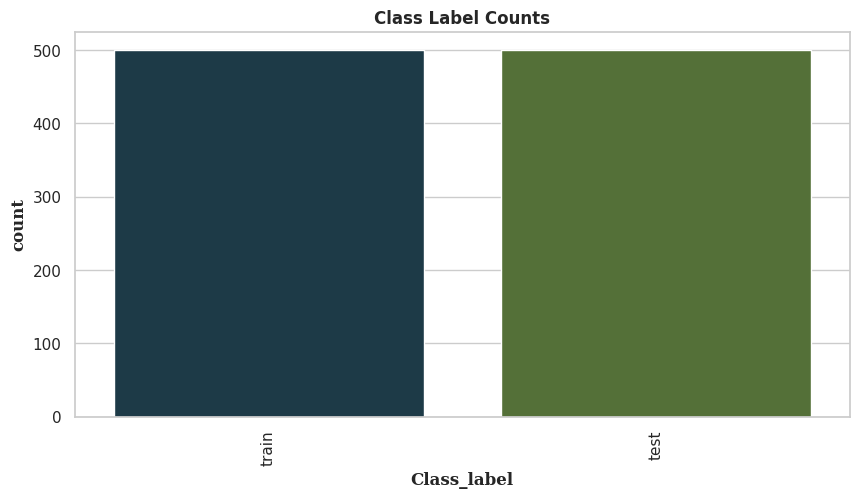

In [89]:
#counts of top 10 drugs
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax=sns.countplot(x="Class_label",data=df_upsampled,palette=sns.color_palette("cubehelix",4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"})

In [90]:
#shuffle the data or mixed the data frac=1 is used for that
data=df_upsampled.sample(frac=1)

In [91]:
data.head()

,Image_path,Class_label
4005,HandGestureDataset/test/NONE/NONE_72.png,test
11044,HandGestureDataset/train/NONE/NONE_401.png,train
3141,HandGestureDataset/test/NONE/NONE_274.png,test
8910,HandGestureDataset/test/NONE/NONE_341.png,test
393,HandGestureDataset/test/TWO/TWO_408.png,test


In [92]:
def resize_images(img):
  #file=image.open(img)
  file=cv2.imread(img)
  #img=file.convert("RGB")
  #img_bgr=img.resize((48,48))
  resized=cv2.resize(file,(48,48),interpolation=cv2.INTER_AREA)#here by using this we convert all images in to 48,48 size only
  img_bgr=np.array(resized)
  return img_bgr

In [93]:
from PIL import Image

In [94]:
images=[resize_images(img)for img in data["Image_path"]]

In [95]:
len(images)


1000

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
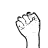

In [96]:
images[0]

In [97]:
#print number of classes in our dataset
num_classes=len(np.unique(data["Class_label"]))

In [98]:
num_classes

2

In [99]:
#save the class into class_names
class_names=list(data["Class_label"])


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
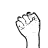

In [100]:
images[0]

Text(0.5, 1.0, 'train')

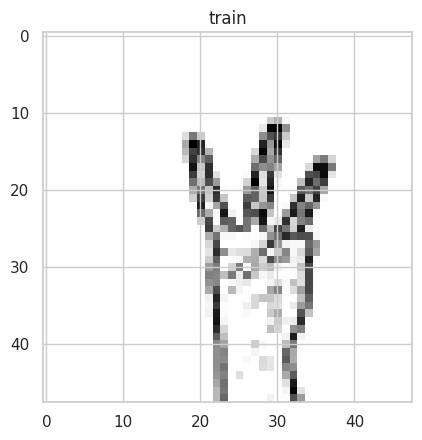

In [101]:
#see the image with class label
plt.imshow(images[5])
plt.title(class_names[5])

Text(0.5, 1.0, 'test')

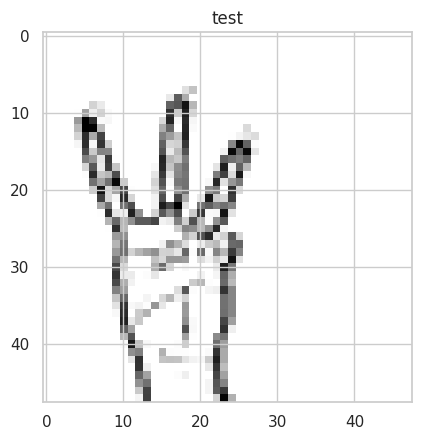

In [102]:
#See the image with class label
plt.imshow(images[10])
plt.title(class_names[10])

Text(0.5, 1.0, 'test')

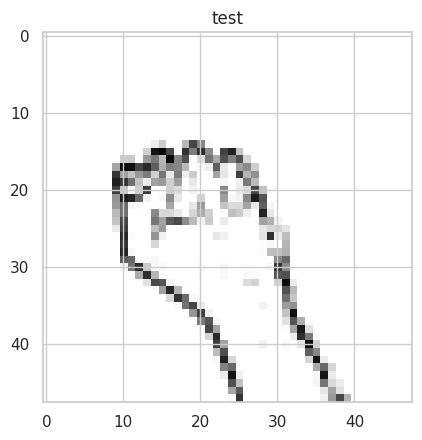

In [103]:
#See the image with class label
plt.imshow(images[400])
plt.title(class_names[400])

Text(0.5, 1.0, 'test')

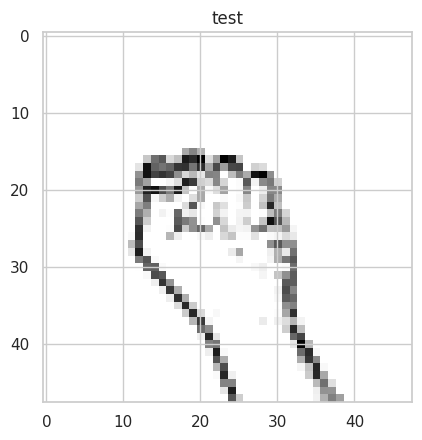

In [104]:
#See the image with class label
plt.imshow(images[70])
plt.title(class_names[70])

# LABEL ENCODER

In [105]:
from sklearn.preprocessing import LabelBinarizer
enc=LabelBinarizer()
y=enc.fit_transform(data["Class_label"])
#by using this we convert to label encoder

In [106]:
data["Class_label"][:10]

,Class_label
4005,test
11044,train
3141,test
8910,test
393,test
78,train
9063,train
2188,train
7322,train
8006,test


In [107]:
images=np.array(images)#CONVERT INTO THE ARRAY

In [108]:
images.shape

(1000, 48, 48, 3)

In [109]:
y.shape

(1000, 1)

In [110]:
y


array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
    

# SPLITING DATA INTO TRAINING AND TESTING

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,y,test_size=0.3,stratify=y,random_state=42)

In [112]:
x_train.shape

(700, 48, 48, 3)

In [113]:
x_test.shape

(300, 48, 48, 3)

# rnn model

In [121]:
model = Sequential()

# Reshape the input to match the expected format for LSTM (samples, timesteps, features)
model.add(Reshape((48, 48*3), input_shape=(48, 48, 3))) # Assuming images are 48x48 with 3 color channels

# LSTM Layer
model.add(LSTM(units=128, return_sequences=True))  # 128 units in the LSTM layer, return sequences for stacking more layers
model.add(Dropout(0.2))

# Another LSTM layer (optional)
model.add(LSTM(units=64))  # 64 units in the second LSTM layer
model.add(Dropout(0.2))

# Dense layers for classification
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)                  │ (None, 48, 144)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 48, 128)             │         139,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 48, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 206,081 (805.00 KB)

 Trainable params: 206,081 (805.00 KB)

 Non-trainable params: 0 (0.00 B)

In [122]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
# Optimizer: Adam (adaptive optimization algorithm), # Loss Function: Categorical Crossentropy (for multi-class classification), # Metrics: Accuracy (percentage of correct predictions)


In [123]:
import warnings
warnings.filterwarnings("ignore")#it remove the warnings

In [124]:

history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=120
                    )

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 354ms/step - accuracy: 0.5004 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - accuracy: 0.5067 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 237ms/step - accuracy: 0.5348 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 386ms/step - accuracy: 0.4934 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - accuracy: 0.4913 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 258ms/step - accuracy: 0.4882 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/step - accuracy: 0.5020 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - accuracy: 

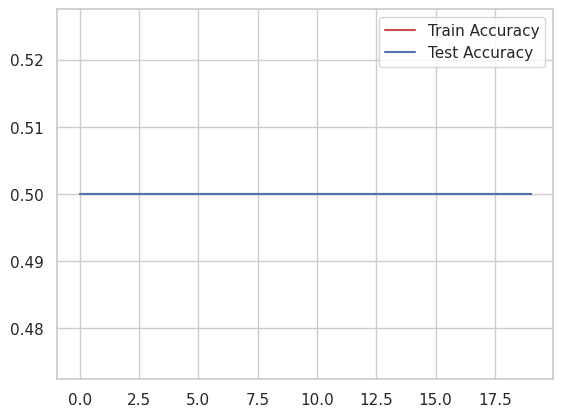

In [125]:
#plot the accuracy plot
plt.plot(history.history["accuracy"], "r")
plt.plot(history.history["val_accuracy"],"b")
plt.legend({"Train Accuracy":"r","Test Accuracy":"b"})
plt.show()

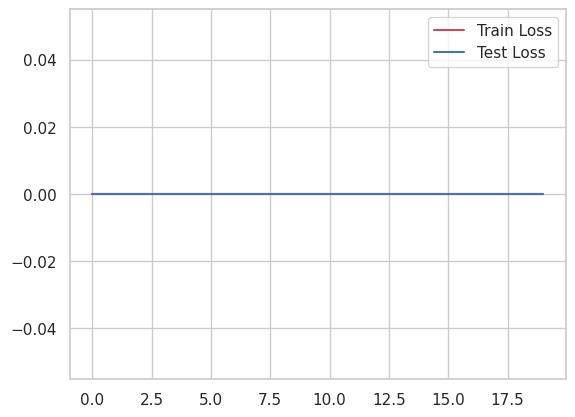

In [126]:
#plot the accuracy plot
plt.plot(history.history["loss"],"r")
plt.plot(history.history["val_loss"],"b")
plt.legend({"Train Loss":"r","Test Loss":"b"})
plt.show()

In [127]:
#print the test accuracy
score_1=model.evaluate(x_test,y_test,verbose=0)
print("Test accuracy:",score_1[1])

Test accuracy: 0.5


In [130]:
results=pd.DataFrame(columns=["Model","Test Accuracy"])

In [132]:
new=["CNN",score_1[1]]
results.loc[1]=new

In [133]:
results

,Model,Test Accuracy
1,CNN,0.5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
Adjusting class names or predictions.


Text(46.25, 0.5, 'True Class')

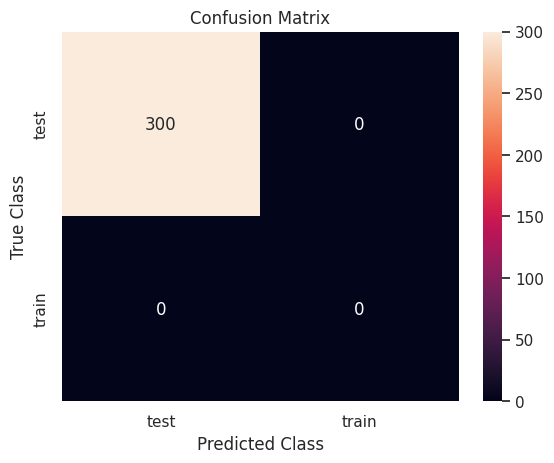

In [136]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np

class_names = enc.classes_  # Assuming enc is your LabelBinarizer

# Get predictions and true labels
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class indices
y_true_classes = np.argmax(y_test, axis=1)  # Get true class indices

# Create confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Ensure class_names and cm shape align
if cm.shape != (len(class_names), len(class_names)):
  # Handle shape mismatch (e.g., if model predicts only one class)
  # You might need to add missing classes or adjust the model's output
  print(f"Warning: Confusion matrix shape ({cm.shape}) doesn't match the number of classes ({len(class_names)}).")
  print("Adjusting class names or predictions.")
  missing_classes = set(range(len(class_names))) - set(np.unique(np.concatenate([y_true_classes, y_pred_classes])))
  for cls_index in missing_classes:
    cm = np.insert(cm, cls_index, 0, axis=0)
    cm = np.insert(cm, cls_index, 0, axis=1)

#Create dataframe
df_heatmap = pd.DataFrame(cm, columns=class_names, index=class_names)

#plot confusion matrix
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")
heatmap.set_title('Confusion Matrix')
heatmap.set_xlabel('Predicted Class')
heatmap.set_ylabel('True Class')

In [137]:
df_heatmap

,test,train
test,300,0
train,0,0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


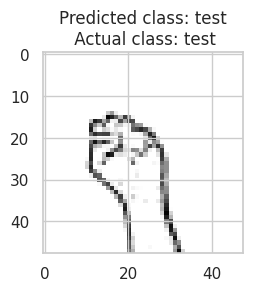

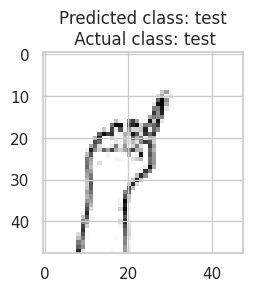

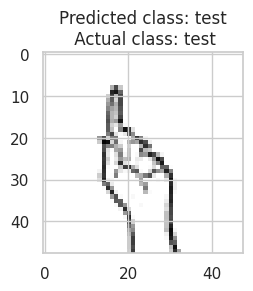

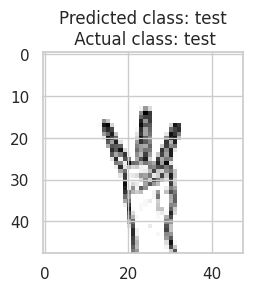

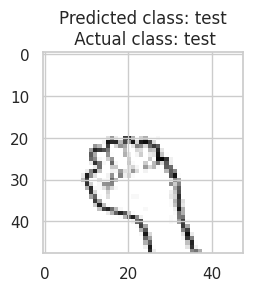

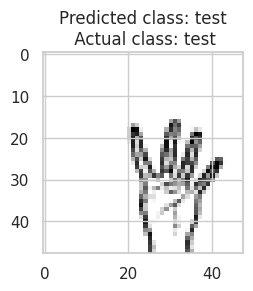

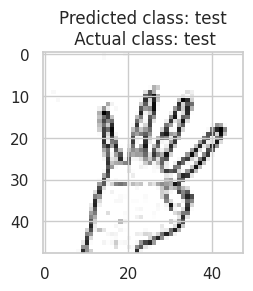

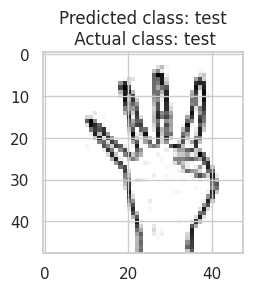

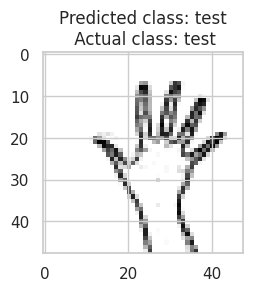

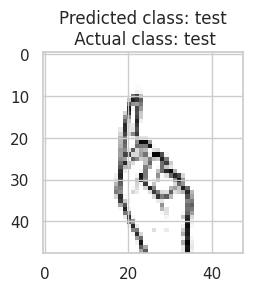

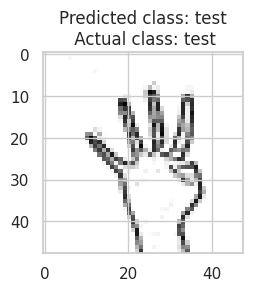

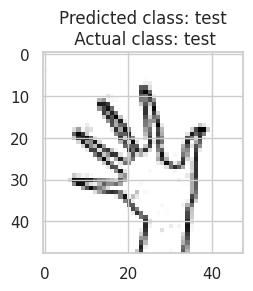

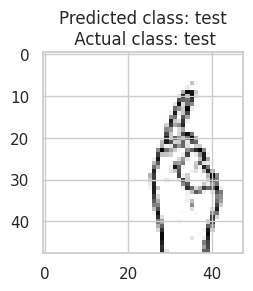

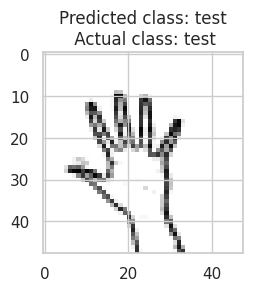

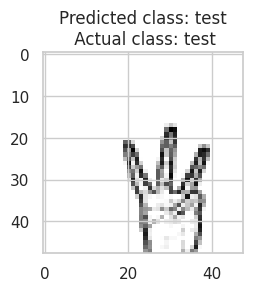

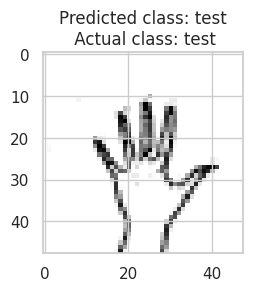

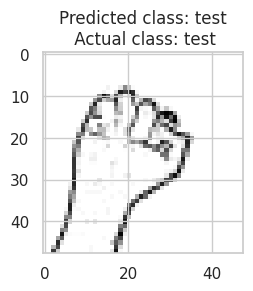

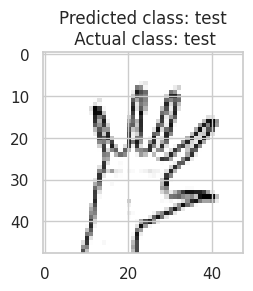

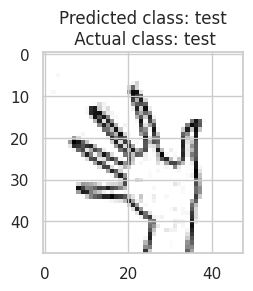

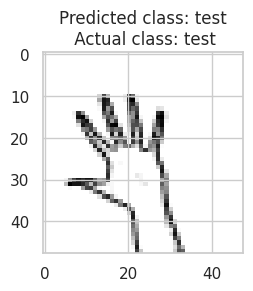

In [138]:
#print images with actual and predicted class labels
# print images with actiual abnd predicted class labels
for i in range(20):
  plt.figure(figsize=(15,15))
  plt.subplot(4,5,i+1)
  pred = model.predict(np.array([x_test[i]]))[0]
  pred = np.argmax(pred)
  act = np.argmax(y_test[i])
  plt.title("Predicted class: {}\n Actual class: {}".format(enc.classes_[pred],enc.classes_[act]))
  # plt.title("Actual class: {}".format(enc.classes_[act]))
  plt.imshow(x_test[i])

# VGG_16 MODEL

In [140]:
from keras.applications.vgg16 import VGG16
vgg=VGG16(weights="imagenet",include_top=False,input_shape=(48,48,3))
vgg.trainable=False

In [148]:
#set the vgg16 model
model_1=Sequential()
model_1.add(vgg)
model_1.add(Flatten())
model_1.add(Dense(128,activation="relu"))
model_1.add(Dropout(0.2))
model_1.add(Dense(1,activation="softmax"))

In [149]:
#compile the model
model_1.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [150]:
History_1=model_1.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),batch_size=128)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 30s 5s/step - accuracy: 0.4969 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.5042 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.4842 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 44s 5s/step - accuracy: 0.5035 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 55s 8s/step - accuracy: 0.5020 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 65s 5s/step - accuracy: 0.4941 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.4874 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.4944 - loss: 0

In [155]:
# print the test accuracy
score_2 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score_2[1])

Test accuracy: 0.5


In [156]:
results=pd.DataFrame(columns=["Model","Test Accuracy"])

In [157]:
new = ['VGG-16 ',score_2[1]]
results.loc[2] = new

In [158]:
results

,Model,Test Accuracy
2,VGG-16,0.5


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 644ms/step


Text(46.25, 0.5, 'True Class')

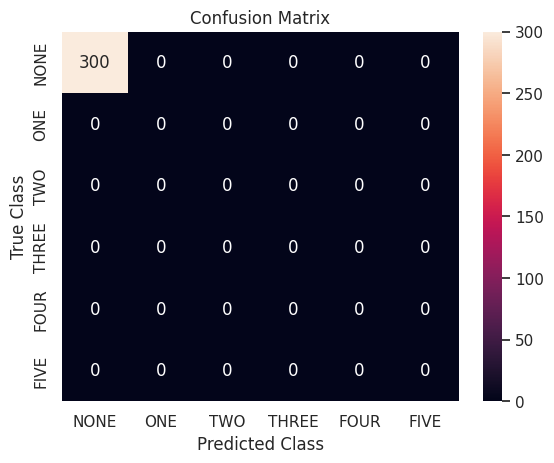

In [161]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'enc' is your LabelBinarizer fitted with the correct class labels
class_names = ['NONE', 'ONE', 'TWO', 'THREE', 'FOUR', 'FIVE']  # Correct class labels

# Get predictions and true labels
y_pred = model_1.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class indices
y_true_classes = np.argmax(y_test, axis=1)  # Get true class indices

# Create confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes, labels=np.arange(len(class_names)))

# Create dataframe
df_heatmap = pd.DataFrame(cm, columns=class_names, index=class_names)

# plot confusion matrix
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")
heatmap.set_title('Confusion Matrix')
heatmap.set_xlabel('Predicted Class')
heatmap.set_ylabel('True Class')

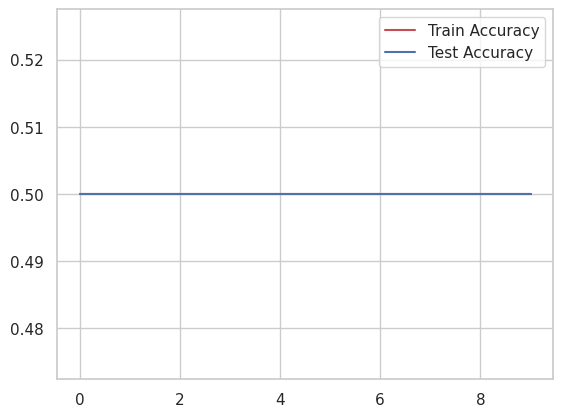

In [162]:
# plot the accuracy plot
plt.plot(History_1.history['accuracy'], 'r')
plt.plot(History_1.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

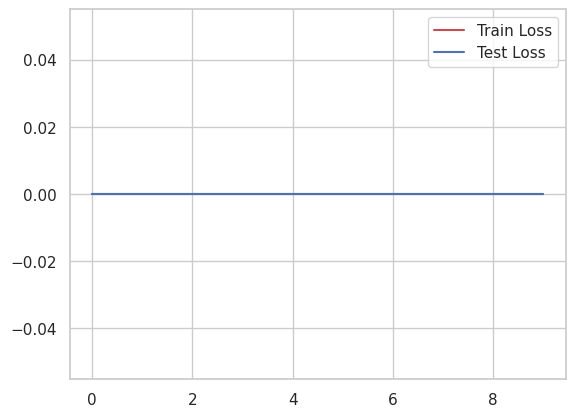

In [163]:
# plot the accuracy plot
plt.plot(History_1.history['loss'], 'r')
plt.plot(History_1.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


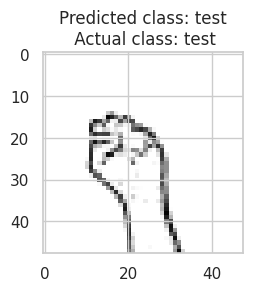

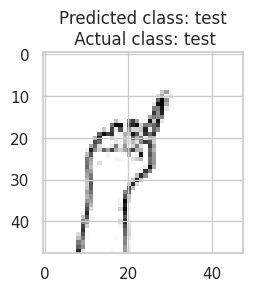

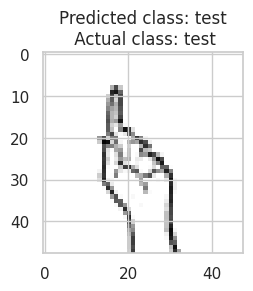

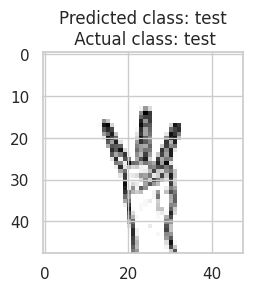

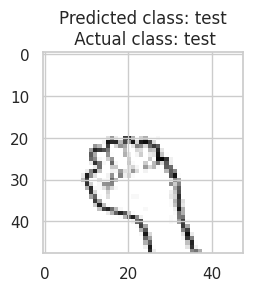

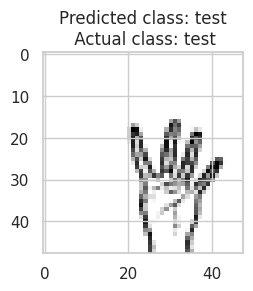

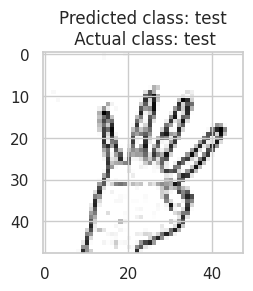

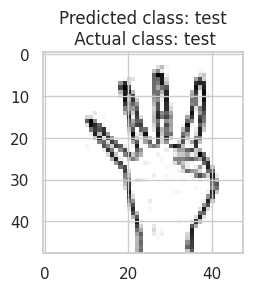

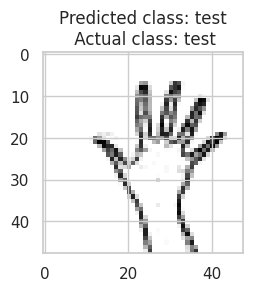

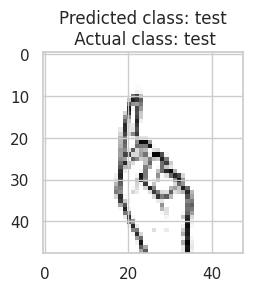

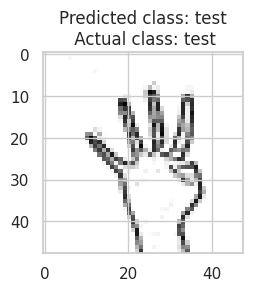

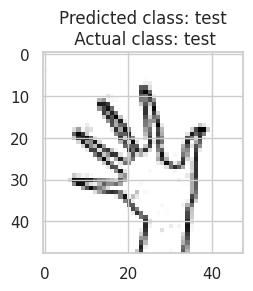

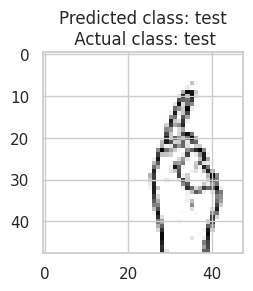

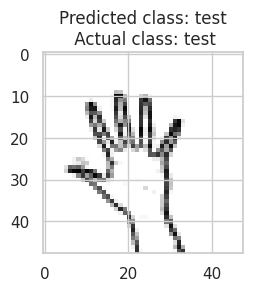

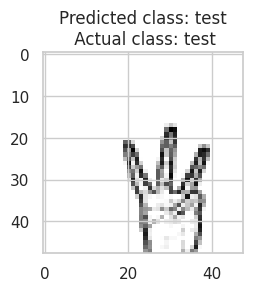

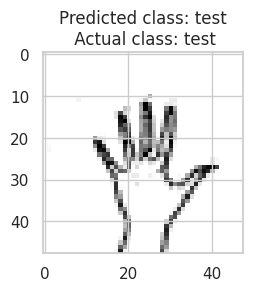

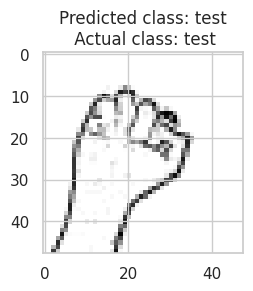

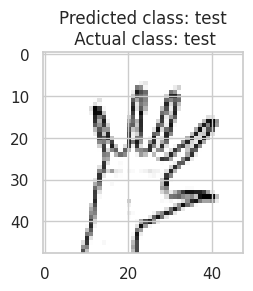

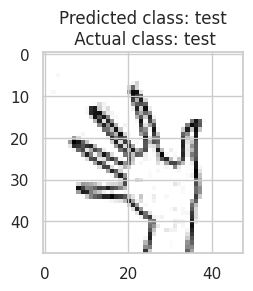

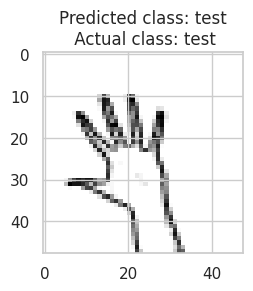

In [164]:
# print images with actiual abnd predicted class labels
for i in range(20):
  plt.figure(figsize=(15,15))
  plt.subplot(4,5,i+1)
  pred = model_1.predict(np.array([x_test[i]]))[0]
  pred = np.argmax(pred)
  act = np.argmax(y_test[i])
  plt.title("Predicted class: {}\n Actual class: {}".format(enc.classes_[pred],enc.classes_[act]))
  # plt.title("Actual class: {}".format(enc.classes_[act]))
  plt.imshow(x_test[i])

# VGG_19 MODEL

In [165]:
# import the vgg16 model
from keras.applications.vgg19 import VGG19

In [166]:
vgg=VGG19(weights='imagenet',include_top=False,input_shape=(48,48,3))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [167]:
#Fit the data or train the model
History_1 = model_1.fit(x_train, y_train, epochs = 20, validation_data = (x_test,y_test),batch_size = 128)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 34s 6s/step - accuracy: 0.4892 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 43s 8s/step - accuracy: 0.4911 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 66s 5s/step - accuracy: 0.4984 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 0.5063 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.4786 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.4994 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.4994 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.5013 - loss: 0

In [168]:
# print the test accuracy
score_2 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score_2[1])

Test accuracy: 0.5


In [169]:
results=pd.DataFrame(columns=["Model","Test Accuracy"])

In [170]:
new = ['VGG-19 ',score_2[1]]
results.loc[3] = new

In [171]:
results

,Model,Test Accuracy
3,VGG-19,0.5


10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step


Text(46.25, 0.5, 'True Class')

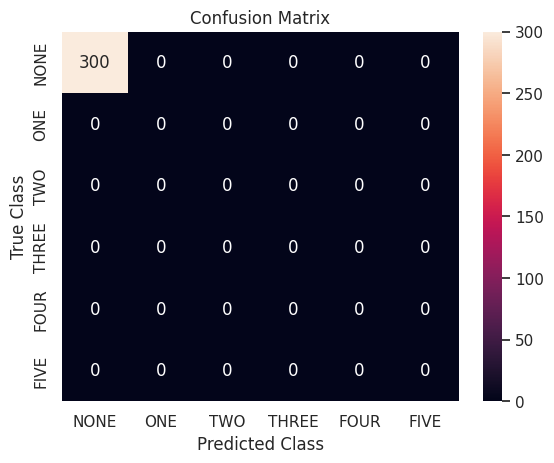

In [177]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'enc' is your LabelBinarizer fitted with the correct class labels
class_names = ['NONE', 'ONE', 'TWO', 'THREE', 'FOUR', 'FIVE']  # Correct class labels

# Get predictions and true labels
y_pred = model_1.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class indices
y_true_classes = np.argmax(y_test, axis=1)  # Get true class indices

# Create confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes, labels=np.arange(len(class_names)))

# Create dataframe
df_heatmap = pd.DataFrame(cm, columns=class_names, index=class_names)

# plot confusion matrix
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")
heatmap.set_title('Confusion Matrix')
heatmap.set_xlabel('Predicted Class')
heatmap.set_ylabel('True Class')

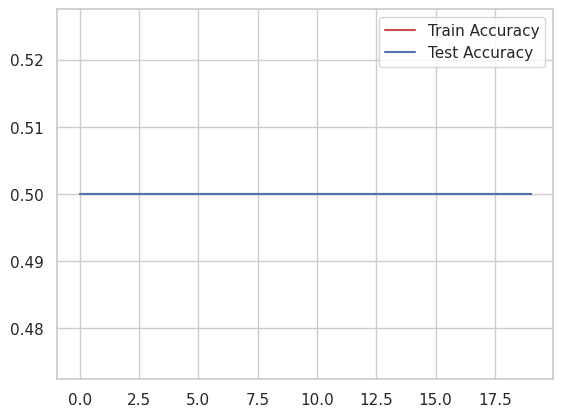

In [178]:
# plot the accuracy plot
plt.plot(History_1.history['accuracy'], 'r')
plt.plot(History_1.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

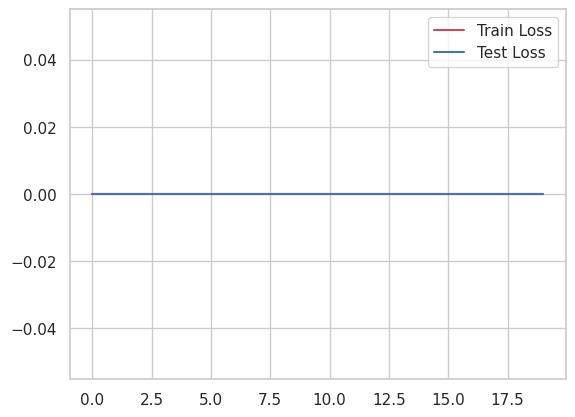

In [179]:
# plot the accuracy plot
plt.plot(History_1.history['loss'], 'r')
plt.plot(History_1.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


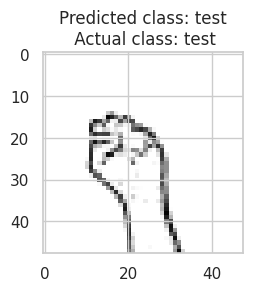

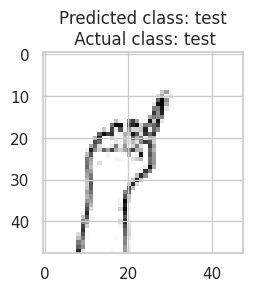

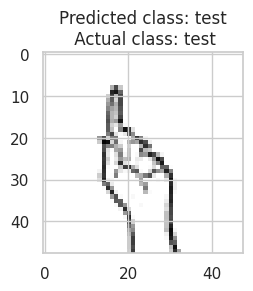

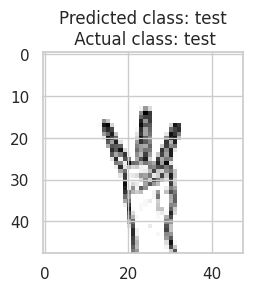

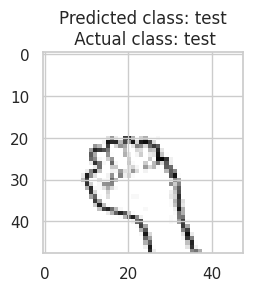

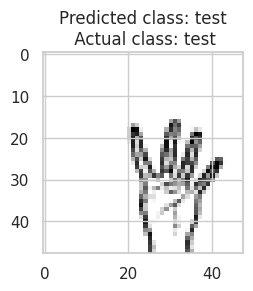

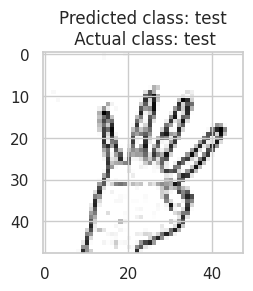

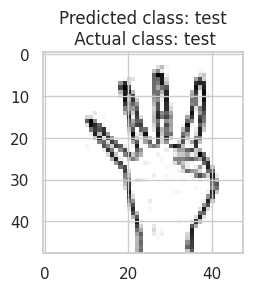

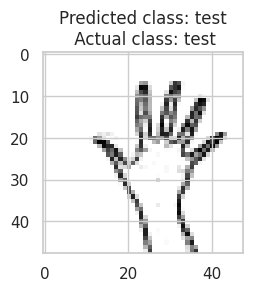

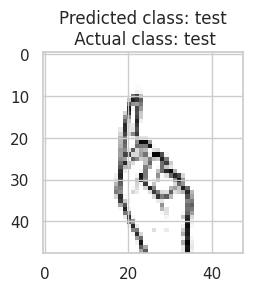

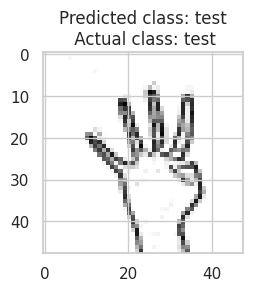

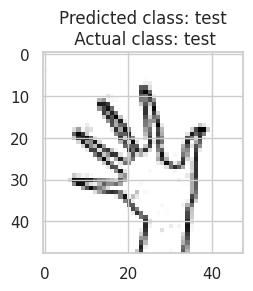

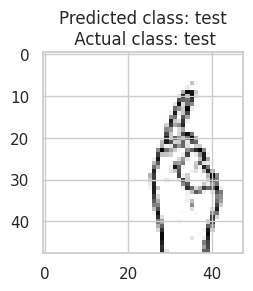

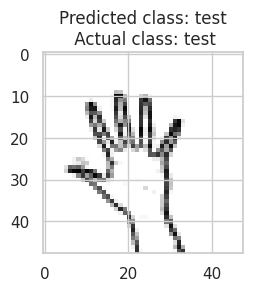

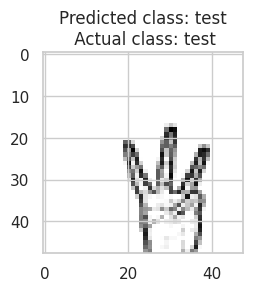

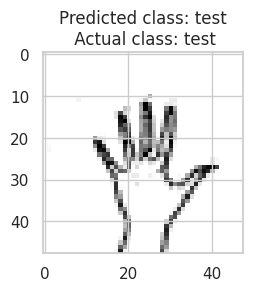

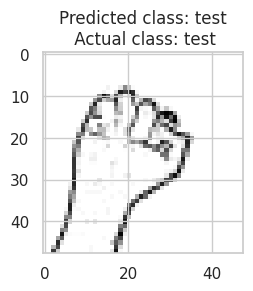

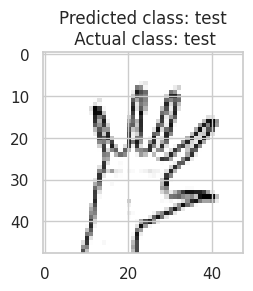

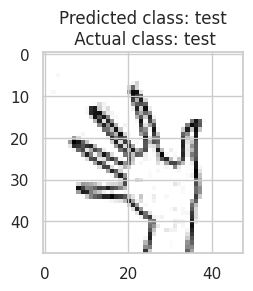

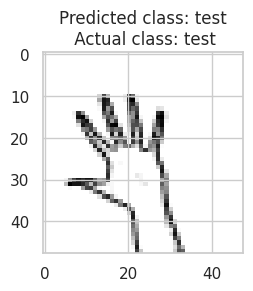

In [172]:
# print images with actiual abnd predicted class labels
for i in range(20):
  plt.figure(figsize=(15,15))
  plt.subplot(4,5,i+1)
  pred = model_1.predict(np.array([x_test[i]]))[0]
  pred = np.argmax(pred)
  act = np.argmax(y_test[i])
  plt.title("Predicted class: {}\n Actual class: {}".format(enc.classes_[pred],enc.classes_[act]))
  # plt.title("Actual class: {}".format(enc.classes_[act]))
  plt.imshow(x_test[i])

# MOBILE NET

In [173]:
# import the vgg16 model
from keras.applications.mobilenet import MobileNet
#from tf.keras.applications.mobilenet.MobileNet

In [174]:
mob=MobileNet(weights='imagenet',include_top=False,input_shape=(48,48,3))

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [175]:
mob.trainable=False

In [184]:
# Set the vgg16 model

model_1=Sequential()
model_1.add(mob)
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(1, activation='softmax'))

In [185]:
#Compile the model
model_1.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

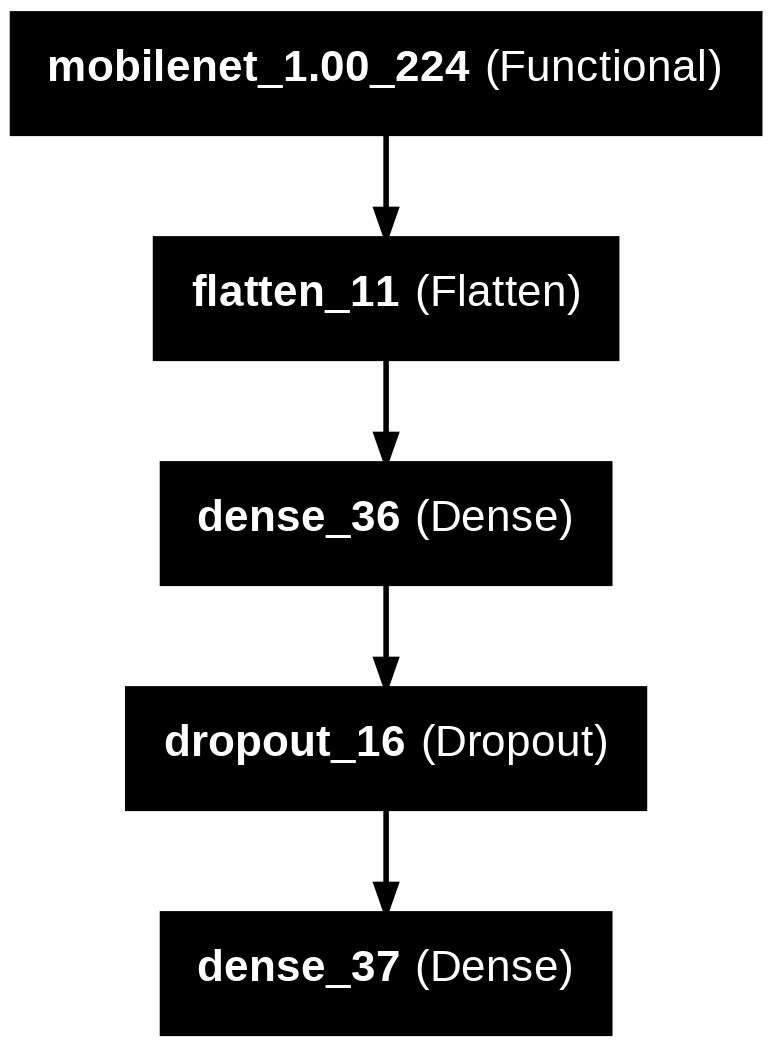

In [186]:
from tensorflow.keras.utils import plot_model # Import plot_model from the correct location
plot_model(model_1, to_file='model_plot.png', show_shapes=False, show_layer_names=True)

In [187]:
#Fit the data or train the model
History_1 = model_1.fit(x_train, y_train, epochs = 20, validation_data = (x_test,y_test),batch_size = 128)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 448ms/step - accuracy: 0.4862 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 291ms/step - accuracy: 0.5197 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 261ms/step - accuracy: 0.4838 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 724ms/step - accuracy: 0.5087 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 552ms/step - accuracy: 0.5092 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 288ms/step - accuracy: 0.4822 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - accuracy: 0.4913 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 360ms/step - accuracy: 

In [188]:
# print the test accuracy
score_2 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score_2[1])


Test accuracy: 0.5


In [189]:
results=pd.DataFrame(columns=["Model","Test Accuracy"])

In [190]:
new = ['Mobile Net ',score_2[1]]
results.loc[4] = new

In [191]:
results

,Model,Test Accuracy
4,Mobile Net,0.5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


Text(46.25, 0.5, 'True Class')

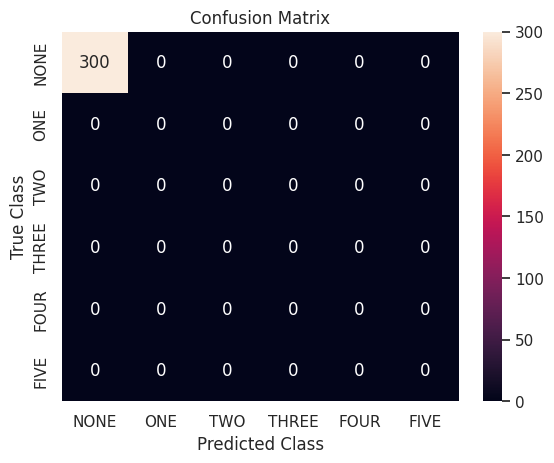

In [194]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'enc' is your LabelBinarizer fitted with the correct class labels
class_names = ['NONE', 'ONE', 'TWO', 'THREE', 'FOUR', 'FIVE']  # Correct class labels

# Get predictions and true labels
y_pred = model_1.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class indices
y_true_classes = np.argmax(y_test, axis=1)  # Get true class indices

# Create confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes, labels=np.arange(len(class_names)))

# Create dataframe
df_heatmap = pd.DataFrame(cm, columns=class_names, index=class_names)

# plot confusion matrix
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")
heatmap.set_title('Confusion Matrix')
heatmap.set_xlabel('Predicted Class')
heatmap.set_ylabel('True Class')

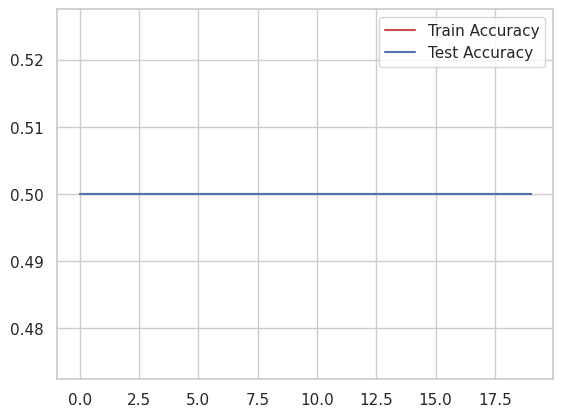

In [195]:
# plot the accuracy plot
plt.plot(History_1.history['accuracy'], 'r')
plt.plot(History_1.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

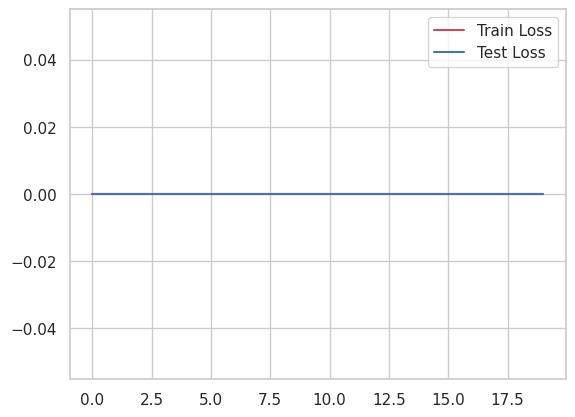

In [196]:
# plot the accuracy plot
plt.plot(History_1.history['loss'], 'r')
plt.plot(History_1.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


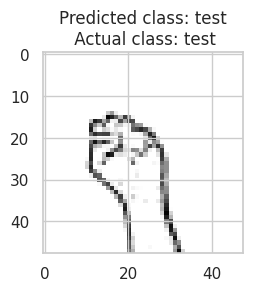

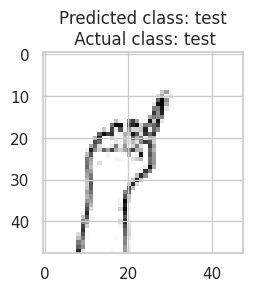

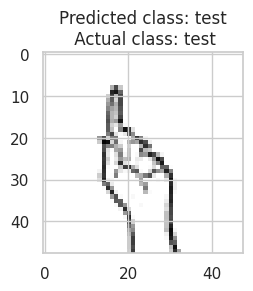

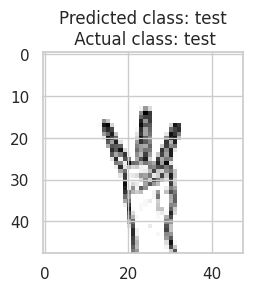

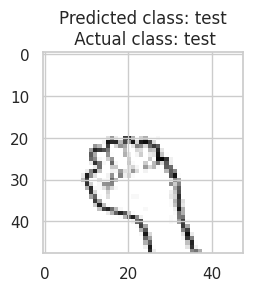

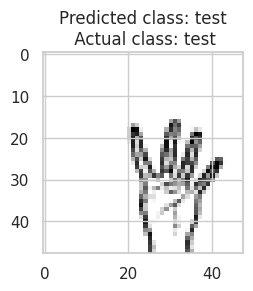

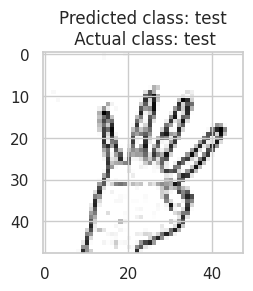

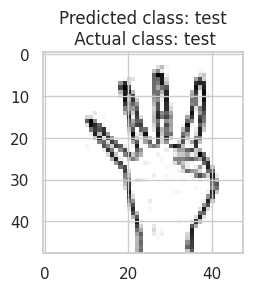

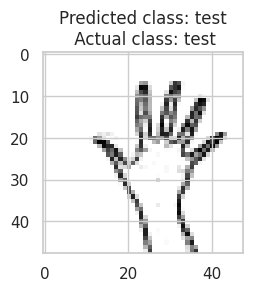

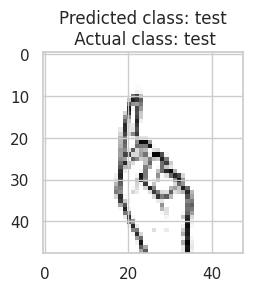

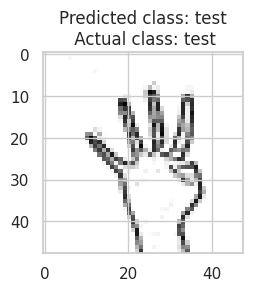

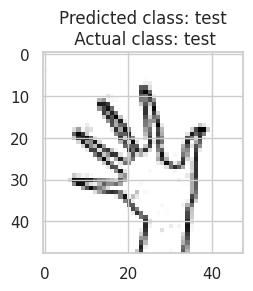

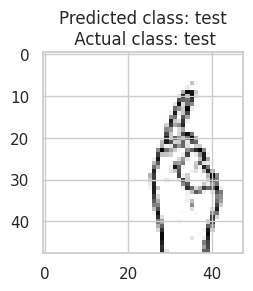

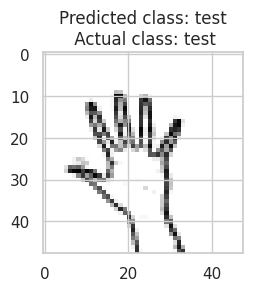

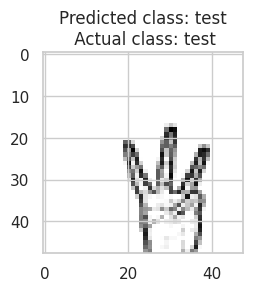

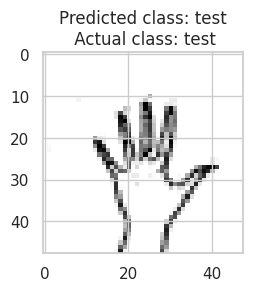

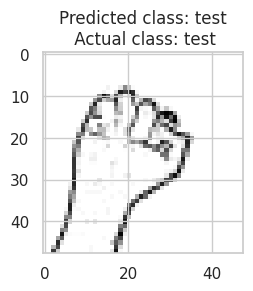

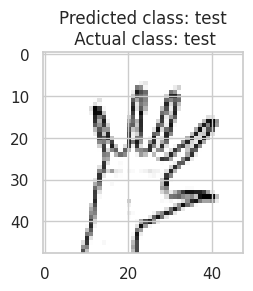

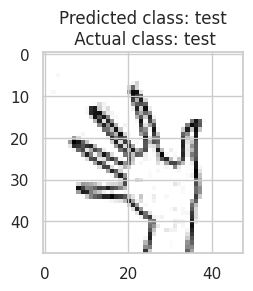

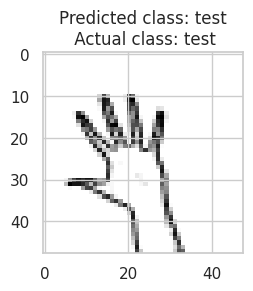

In [197]:
# print images with actiual abnd predicted class labels
for i in range(20):
  plt.figure(figsize=(15,15))
  plt.subplot(4,5,i+1)
  pred = model_1.predict(np.array([x_test[i]]))[0]
  pred = np.argmax(pred)
  act = np.argmax(y_test[i])
  plt.title("Predicted class: {}\n Actual class: {}".format(enc.classes_[pred],enc.classes_[act]))
  # plt.title("Actual class: {}".format(enc.classes_[act]))
  plt.imshow(x_test[i])

# PERFORMANCE TABLE

In [199]:


data = {
    'Model': ['RNN', 'VGG16', 'VGG19', 'MobileNetV2'],
    'Test Accuracy': [score_1[1], score_2[1], score_2[1], score_2[1]],  # Replace with actual test accuracy values
    'Train Accuracy': [max(history.history['accuracy']), max(History_1.history['accuracy']), max(History_1.history['accuracy']), max(History_1.history['accuracy'])], #Replace with actual train accuracy
    'Test Loss': [min(history.history['val_loss']), min(History_1.history['val_loss']),min(History_1.history['val_loss']),min(History_1.history['val_loss'])], # Replace with your actual test loss
    'Train Loss': [min(history.history['loss']), min(History_1.history['loss']), min(History_1.history['loss']),min(History_1.history['loss'])] # Replace with actual train loss
}

results = pd.DataFrame(data)
results


,Model,Test Accuracy,Train Accuracy,Test Loss,Train Loss
0,RNN,0.5,0.5,0.0,0.0
1,VGG16,0.5,0.5,0.0,0.0
2,VGG19,0.5,0.5,0.0,0.0
3,MobileNetV2,0.5,0.5,0.0,0.0
